<div style="background-color: lightblue; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">COVID-19 Global Statistics - Exploratory Data Analysis
</h1>
</div>

In [33]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from scipy.stats.mstats import winsorize 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import geopandas as gpd

In [34]:
#Loading the dataset into a dataframe
df=pd.read_csv(r"C:\Users\admin\Desktop\covid19\COVID-19 Global Statistics Dataset.csv")
df.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
5,S. Korea,"34,571,873",NaN,"35,934",NaN,"34,535,939",NaN,0,NaN,"673,523",700,"15,804,065","307,892","51,329,899"
6,Japan,"33,803,572",NaN,"74,694",NaN,NaN,NaN,NaN,NaN,"269,169",595,"100,414,883","799,578","125,584,838"
7,Italy,"26,716,804",NaN,"196,257",NaN,"26,347,863",NaN,"172,684",67,"443,338","3,257","280,238,086","4,650,269","60,262,770"
8,UK,"24,898,914",NaN,"232,112",NaN,"24,655,170",NaN,"11,632",NaN,"363,499","3,389","522,526,476","7,628,357","68,497,907"
9,Russia,"23,957,146",NaN,"402,264",NaN,"23,370,779",NaN,"184,103",NaN,"164,308","2,759","273,400,000","1,875,095","145,805,947"


In [35]:
#displaying sample 10 rows from the dataset
df.sample(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
38,Romania,"3,524,982",NaN,"68,860",NaN,"3,452,423",NaN,"3,699",29,"185,220","3,618","28,616,133","1,503,632","19,031,335"
150,Gabon,"49,051",NaN,307,NaN,"48,674",NaN,70,NaN,"21,038",132,"1,621,909","695,641","2,331,533"
171,San Marino,"26,185",NaN,128,NaN,"26,011",NaN,46,NaN,"768,226","3,755","196,855","5,775,414","34,085"
105,Algeria,"272,010",NaN,"6,881",NaN,"183,061",NaN,"82,068",NaN,"5,998",152,"230,960","5,093","45,350,148"
47,Bangladesh,"2,047,373",NaN,"29,482",NaN,NaN,NaN,NaN,NaN,"12,195",176,"15,254,399","90,862","167,885,689"
191,CAR,"15,440",NaN,113,NaN,"15,200",NaN,127,2,"3,078",23,"81,294","16,205","5,016,678"
148,Burundi,"54,721",NaN,38,NaN,"53,569",NaN,"1,114",NaN,"4,334",3,"345,742","27,386","12,624,840"
149,Seychelles,"51,220",NaN,172,NaN,"51,048",NaN,0,NaN,"515,157","1,730",NaN,NaN,"99,426"
158,Togo,"39,557",NaN,290,NaN,"39,265",NaN,2,NaN,"4,557",33,"814,921","93,876","8,680,837"
161,Isle of Man,"38,008",NaN,116,NaN,NaN,NaN,NaN,NaN,"443,335","1,353","150,753","1,758,422","85,732"


In [36]:
#shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 239 rows and 14 columns


In [37]:
#Excluding all "total" columns from the dataframe
df.tail(10)
df=df_raw.loc[:230]

In [38]:
#number of null values in each column
df.isnull().sum()

Country                0
Total Cases            0
New Cases            223
Total Deaths           5
New Deaths             0
Total Recovered       49
New Recovered        217
Active Cases          48
Serious, Critical    179
Tot Cases/1M pop       2
Deaths/1M pop          7
Total Tests           18
Tests/1M pop          18
Population             2
dtype: int64

<Axes: >

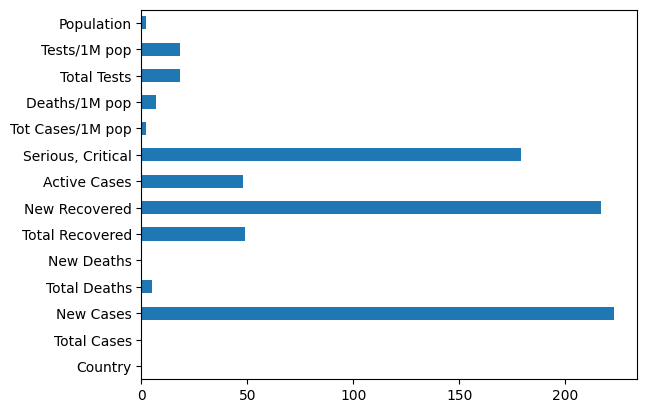

In [39]:
#bar plot of null values in each column
df.isna().sum().plot(kind='barh')

In [40]:
#checking for duplicate records
print(f'Total duplicate values: {df.duplicated().sum()}')

Total duplicate values: 0


In [41]:
#datatypes of each column
dataTypes = df.dtypes
dataTypes

Country               object
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths           float64
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/1M pop      object
Deaths/1M pop         object
Total Tests           object
Tests/1M pop          object
Population            object
dtype: object

In [42]:
#changing the data type of columns from object to float
df['Total Cases'] = df['Total Cases'].str.replace(',', '')
df['Total Cases'] = df['Total Cases'].apply(lambda x: float(x))

df['New Cases'] = df['New Cases'].str.replace(',', '')
df['New Cases'] = df['New Cases'].apply(lambda x: float(x))

df['Total Recovered'] = df['Total Recovered'].str.replace(',', '')
df['Total Recovered'] = df['Total Recovered'].apply(lambda x: float(x))

df['Total Deaths'] = df['Total Deaths'].str.replace(',', '')
df['Total Deaths'] = df['Total Deaths'].apply(lambda x: float(x))

df['New Recovered'] = df['New Recovered'].str.replace(',', '')
df['New Recovered'] = df['New Recovered'].apply(lambda x: float(x))

df['Active Cases'] = df['Active Cases'].str.replace(',', '')
df['Active Cases'] = df['Active Cases'].apply(lambda x: float(x))

df['Serious, Critical'] = df['Serious, Critical'].str.replace(',', '')
df['Serious, Critical'] = df['Serious, Critical'].apply(lambda x: float(x))

df['Tot Cases/1M pop'] = df['Tot Cases/1M pop'].str.replace(',', '')
df['Tot Cases/1M pop'] = df['Tot Cases/1M pop'].apply(lambda x: float(x))

df['Deaths/1M pop'] = df['Deaths/1M pop'].str.replace(',', '')
df['Deaths/1M pop'] = df['Deaths/1M pop'].apply(lambda x: float(x))

df['Total Tests'] = df['Total Tests'].str.replace(',', '')
df['Total Tests'] = df['Total Tests'].apply(lambda x: float(x))

df['Tests/1M pop'] = df['Tests/1M pop'].str.replace(',', '')
df['Tests/1M pop'] = df['Tests/1M pop'].apply(lambda x: float(x))

df['Population'] = df['Population'].str.replace(',', '')
df['Population'] = df['Population'].apply(lambda x: float(x))


C:\Users\admin\AppData\Local\Temp\ipykernel_3360\2959429591.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_3360\2959429591.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_3360\2959429591.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [43]:
#filling null values with 0 to help visualization and calculations
df.fillna({'New Cases':0,'New Deaths':0,'New Recovered':0,'Serious, Critical':0,'Total Deaths':0,'Total Recovered':0,'Active Cases':0,'Tot Cases/1M pop':0,'Deaths/1M pop':0,'Total Tests':0,'Tests/1M pop':0,'Population':0},inplace=True)
display(df['New Cases'].isnull().sum())

C:\Users\admin\AppData\Local\Temp\ipykernel_3360\4143502899.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [44]:
#checking data types after conversion
dataTypes = df.dtypes
dataTypes

Country               object
Total Cases          float64
New Cases            float64
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
New Recovered        float64
Active Cases         float64
Serious, Critical    float64
Tot Cases/1M pop     float64
Deaths/1M pop        float64
Total Tests          float64
Tests/1M pop         float64
Population           float64
dtype: object

In [45]:
#descriptive statistics of df
df.describe(include='all')

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
count,231,2.310000e+02,231.000000,2.310000e+02,231.000000,2.310000e+02,231.000000,2.310000e+02,231.000000,231.000000,231.000000,2.310000e+02,2.310000e+02,2.310000e+02
unique,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.045589e+06,10.588745,3.023811e+04,0.160173,2.370657e+06,21.744589,2.639354e+04,16.354978,201035.142857,1237.376623,3.041125e+07,1.987570e+06,3.439366e+07
std,NaN,9.992410e+06,97.607286,1.082073e+05,1.887111,9.135559e+06,160.860457,1.412145e+05,121.532334,206006.008189,1307.719921,1.154192e+08,3.549645e+06,1.380709e+08
min,NaN,9.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.606950e+04,0.000000,1.855000e+02,0.000000,1.767500e+03,0.000000,0.000000e+00,0.000000,17655.500000,133.500000,2.260585e+05,8.465900e+04,4.281115e+05
50%,NaN,2.068970e+05,0.000000,1.971000e+03,0.000000,5.457800e+04,0.000000,1.410000e+02,0.000000,128418.000000,783.000000,1.690934e+06,7.173800e+05,5.554960e+06
75%,NaN,1.347862e+06,0.000000,1.428700e+04,0.000000,1.020058e+06,0.000000,2.729000e+03,0.000000,327944.500000,2038.500000,1.163986e+07,2.126400e+06,2.183934e+07


## Overall situation analysis 

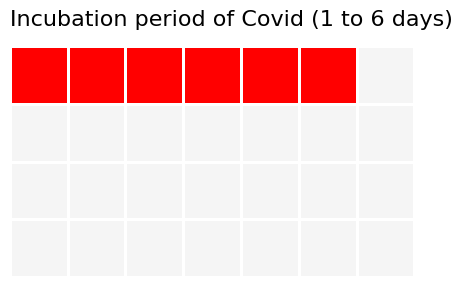

In [46]:
#covid incubation period

def plot_cal(title, start, end):
    '''Plot incubation period'''
    inc_day = []
    for i in range(1, 29):
        if(i>=start and i<=end):
            inc_day.append(1)
        else:
            inc_day.append(0)
            
    inc_day = np.array(inc_day)
    inc_day = inc_day.reshape(4, 7)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax=sns.heatmap(inc_day, linewidths=2, square=True, 
                   xticklabels='', yticklabels='', ax=ax,
                   cbar=False, cmap=['whitesmoke','red'])
    ax.set_title(title, fontdict={'fontsize':16}, loc='left', pad=15)
    
    plt.show()
    
plot_cal('Incubation period of Covid (1 to 6 days)', 1, 6)

C:\Users\admin\AppData\Local\Temp\ipykernel_3360\1388977670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Recovered'] = df['Total Recovered'].fillna(df['Total Cases'] - df['Total Deaths'])


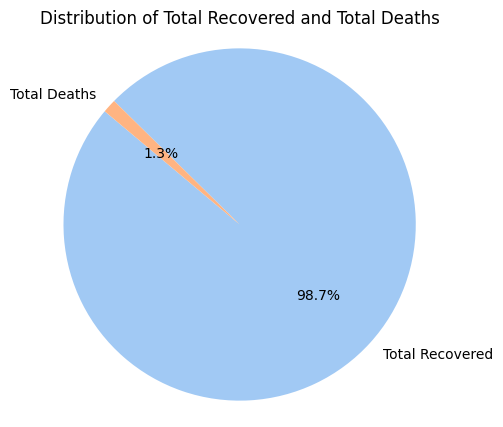

In [ ]:
#filling in the null values of total recovered column
#plotting pie chart of total recovered vs total deaths
df['Total Recovered'] = df['Total Recovered'].fillna(df['Total Cases'] - df['Total Deaths'])

total_recovered = df['Total Recovered'].sum()
total_deaths = df['Total Deaths'].sum()

sizes = [total_recovered, total_deaths]
labels = ['Total Recovered', 'Total Deaths']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Distribution of Total Recovered and Total Deaths')
plt.show()

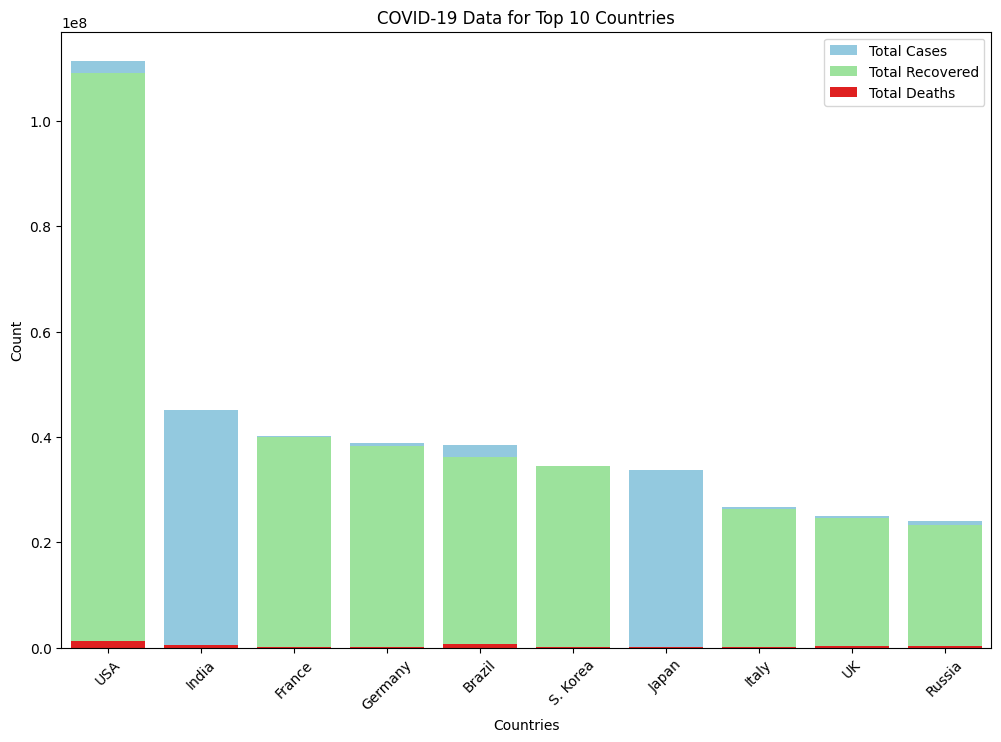

In [ ]:
#composition bar chart of total cases, deaths and recovered
top_10_countries = df.nlargest(10, 'Total Cases')

plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Total Cases', data=top_10_countries, color='skyblue', label='Total Cases')
sns.barplot(x='Country', y='Total Recovered', data=top_10_countries, color='lightgreen', label='Total Recovered')
sns.barplot(x='Country', y='Total Deaths', data=top_10_countries, color='red', label='Total Deaths')

plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('COVID-19 Data for Top 10 Countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()

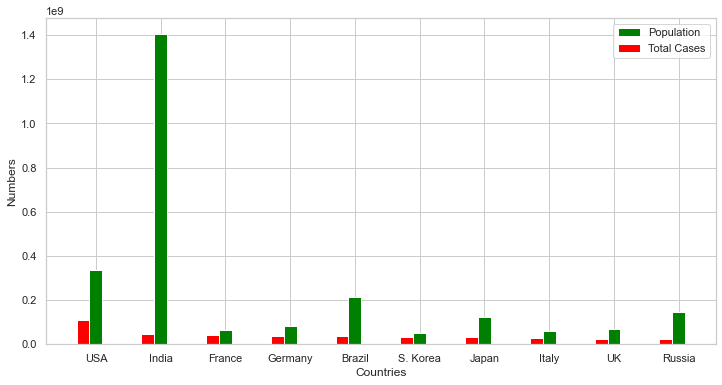

In [ ]:
#population vs total cases chart
plt.figure(figsize=(12, 6))

x=np.arange(10)
width = 0.2
  
# plot data in grouped manner of bar type 

plt.bar(x, df[:10]['Population'], width, color='green') 
plt.bar(x-0.2, df[:10]['Total Cases'], width, color='red') 
#plt.bar(x+0.2,top_10_countries['Total Deaths'], width, color='green') 
plt.xticks(x, df[:10]['Country']) 
plt.xlabel("Countries") 
plt.ylabel("Numbers") 
plt.legend(["Population","Total Cases"]) 
plt.show() 

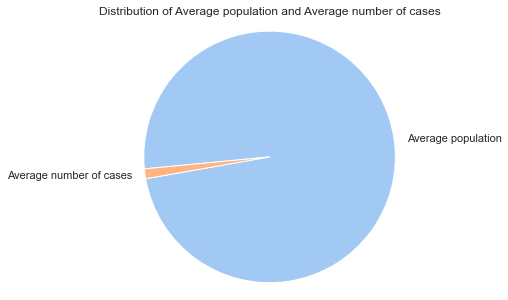

In [ ]:
#pie chart of average population and average cases in the world
avg_population = df['Total Recovered'].mean()
avg_cases = df['Total Deaths'].mean()

sizes = [avg_population, avg_cases]
labels = ['Average population', 'Average number of cases']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels,  startangle=190, colors=sns.color_palette('pastel'))
plt.axis('equal')
plt.title('Distribution of Average population and Average number of cases')
plt.show()

## Country centered analysis

In [ ]:
#Top 20 Countries in view of Total Cases
fig = px.bar(df.head(20), x='Country', y='Total Cases', color='Country')
fig.update_layout(template='presentation')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Cases",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 20 Countries in view of Total Deaths
df_deaths=df.sort_values(by=['Total Deaths'],ascending=False)
fig = px.bar(df_deaths.head(20), x='Country', y='Total Deaths',hover_data=['Total Deaths'], color='Country')
fig.update_layout(template='presentation')
fig.update_layout(title="Top 20 Countries in view of Total Deaths",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")

fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 20 Countries in view of Total Recovered
df_recovered=df.sort_values('Total Recovered',ascending=False)
fig = px.bar(df_recovered.head(20), x='Country', y='Total Recovered', color='Country')
fig.update_layout(template='presentation')
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Recovered",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
df_test=df.sort_values('Total Tests',ascending=False)
fig = px.bar(df_test.head(20), x='Country', y='Total Tests', color='Country')
fig.update_layout(template='presentation')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total Tests",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.update_xaxes(tickangle=270)
fig.show()

## Testing efforts 

In [ ]:
df1=df.sort_values('Deaths/1M pop',ascending=False)
fig = px.bar(df1.head(20), x='Country', y='Deaths/1M pop', color='Country')
fig.update_layout(template='presentation')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total deaths per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "Deaths/1M pop")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 10 countries with total number of cases vs total number of tests
fig = go.Figure()
fig.add_trace(go.Bar(x=df[:10].Country, y=df['Total Tests'][:10],marker_color='green',name='Total Tests'))
fig.add_trace(go.Bar(x=df[:10].Country, y=df['Total Cases'][:10],marker_color='red',name='Total Cases'))
fig.update_layout(template='simple_white')
fig.update_layout(title="Comparison between Total Tests and Total number of Cases")
fig.show()

In [ ]:
#Top 20 Countries in view of Total tests per 1 million
df1=df.sort_values('Tests/1M pop',ascending=False)
fig = px.bar(df1.head(20), x='Country', y='Tests/1M pop', color='Country')
fig.update_layout(template='plotly')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of Total tests per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "total tests")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Bar Chart between cases and tests per 1 million
fig = go.Figure(data=[
    go.Bar(x=df[:10].Country, y=df['Tot Cases/1M pop'][:10], marker_color='#fcbd22', name='Tot Cases/1M pop'),
    go.Bar(x=df[:10].Country, y=df['Tests/1M pop'][:10], marker_color='#3f98b4', name='Tests/1M pop')
])
fig.update_layout(barmode='group')
fig.update_layout(template='simple_white')
fig.update_layout(title="A comparitive Bar Chart between cases and tests per 1 million",
                 xaxis_title= "Country Name",
                 yaxis_title= "Number")
fig.show()

In [ ]:
#creating new dataframe with additional columns that represent different attribute rates
df_new=df.copy()
df_new['Test positivity rate']=df['Total Cases']/df['Total Tests']
df_new=df_new.sort_values('Test positivity rate',ascending=False)



df_new['Cases per population']=df['Total Cases']/df['Population']
df_new=df_new.sort_values('Cases per population',ascending=False)

df_new['Death rate']=df['Total Deaths']/df['Total Cases']
df_new=df_new.sort_values('Death rate',ascending=False)

df_new['Test rate']=df['Total Tests']/df['Population']
df_new=df_new.sort_values('Test rate',ascending=False)

df_new['Recovery rate']=df['Total Recovered']/df['Total Cases']
df_new=df_new.sort_values('Recovery rate',ascending=False)


df_new.replace([np.inf], 0, inplace=True)

df_new

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Test positivity rate,Cases per population,Death rate,Test rate,Recovery rate
227,Vatican City,29.000,0.000,0.000,0.000,29.000,0.000,0.000,0.000,36295.000,0.000,0.000,0.000,799.000,0.000,0.036,0.000,0.000,1.000
222,Falkland Islands,1930.000,0.000,0.000,0.000,1930.000,0.000,0.000,0.000,545352.000,0.000,8632.000,2439107.000,3539.000,0.224,0.545,0.000,2.439,1.000
31,DPRK,4772813.000,0.000,74.000,0.000,4772739.000,0.000,0.000,0.000,183636.000,3.000,0.000,0.000,25990679.000,0.000,0.184,0.000,0.000,1.000
5,S. Korea,34571873.000,0.000,35934.000,0.000,34535939.000,0.000,0.000,0.000,673523.000,700.000,15804065.000,307892.000,51329899.000,2.188,0.674,0.001,0.308,0.999
188,Marshall Islands,16138.000,0.000,17.000,0.000,16121.000,0.000,0.000,0.000,268711.000,283.000,0.000,0.000,60057.000,0.000,0.269,0.001,0.000,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Kuwait,667026.000,0.000,2570.000,0.000,0.000,0.000,0.000,0.000,152278.000,587.000,8455743.000,1930391.000,4380326.000,0.079,0.152,0.004,1.930,0.000
206,Sierra Leone,7779.000,0.000,126.000,0.000,0.000,0.000,0.000,0.000,937.000,15.000,259958.000,31296.000,8306436.000,0.030,0.001,0.016,0.031,0.000
132,Malawi,89168.000,0.000,2686.000,0.000,0.000,0.000,0.000,0.000,4418.000,133.000,624784.000,30959.000,20180839.000,0.143,0.004,0.030,0.031,0.000
10,Turkey,17232066.000,0.000,102174.000,0.000,0.000,0.000,0.000,0.000,201399.000,1194.000,162743369.000,1902052.000,85561976.000,0.106,0.201,0.006,1.902,0.000


In [ ]:
#Test positivity rate graph of top 20 countries
df_sort=df_new.sort_values('Test positivity rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Test positivity rate', color='Country')
fig.update_layout(template='plotly')
fig.update_layout(title="Top 20 Countries in view of Test positivity rate",
                 xaxis_title= "Country Name",
                 yaxis_title= "Test positivity rate")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 20 Countries in view of Cases per population
df_sort=df_new.sort_values('Cases per population',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Cases per population', color='Country')
fig.update_layout(template='plotly')
fig.update_layout(title="Top 20 Countries in view of Cases per population",
                 xaxis_title= "Country Name",
                 yaxis_title= "Cases per population")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 20 Countries in view of death rate
df_sort=df_new.sort_values('Death rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Death rate', color='Country')
fig.update_layout(template='seaborn')
# Alternative way for doing background dark
#fig.update_layout(plot_bgcolor = "black")
fig.update_layout(title="Top 20 Countries in view of death rate",
                 yaxis_title= "Death rate")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 20 Countries in view of Test rate
df_sort=df_new.sort_values('Test rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Test rate', color='Country')
fig.update_layout(template='ggplot2')
fig.update_layout(title="Top 20 Countries in view of Test rate",
                 xaxis_title= "Country Name",
                 yaxis_title= "Test rate")
fig.update_xaxes(tickangle=270)
fig.show()

In [ ]:
#Top 20 Countries in view of recovery rate
df_sort=df_new.sort_values('Recovery rate',ascending=False)
fig = px.bar(df_sort.head(20), x='Country', y='Recovery rate', color='Country')
fig.update_layout(template='plotly')
fig.update_layout(title="Top 20 Countries in view of recovery rate",
                 xaxis_title= "Country Name",
                 yaxis_title= "Recovery rate")
fig.update_xaxes(tickangle=270)
fig.show()

## Region/ country comparison

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio

# You may need to download the world choropleth map
pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = df['Country'],
    z = df['Total Cases'],
    locationmode = 'country names',
    colorscale = 'Blues',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total COVID-19 Cases by Country',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()


In [ ]:
#Total COVID-19 Tests conducted by Country

pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = df['Country'],
    z = df['Tests/1M pop'],
    locationmode = 'country names',
    colorscale = 'Greens',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total COVID-19 Tests conducted by Country',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()


In [ ]:
# Total COVID-19 deaths by Country
pio.templates.default = "plotly"
world_map = go.Figure(go.Choropleth(
    locations = df['Country'],
    z = df['Total Deaths'],
    locationmode = 'country names',
    colorscale = 'Reds',
    colorbar_title = 'Total',
))

world_map.update_layout(
    title_text = 'Total COVID-19 deaths by Country',
    geo=dict(
        showcoastlines=True,
        showland=True,
        showframe=False,
        projection_type='equirectangular'
    )
)
world_map.show()


## Correlation and prediction

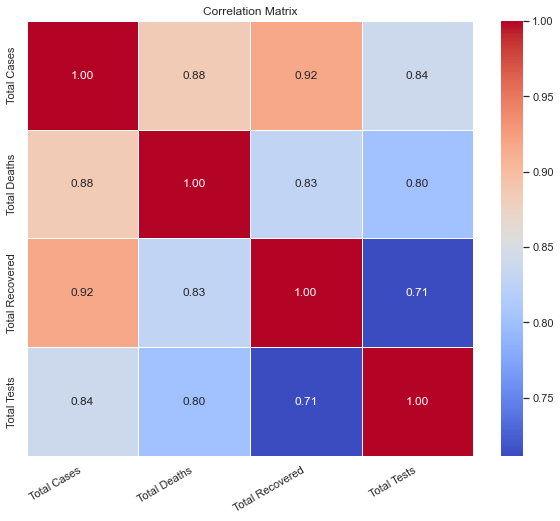

In [ ]:
# Assign the columns
columns_of_interest = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Total Tests']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

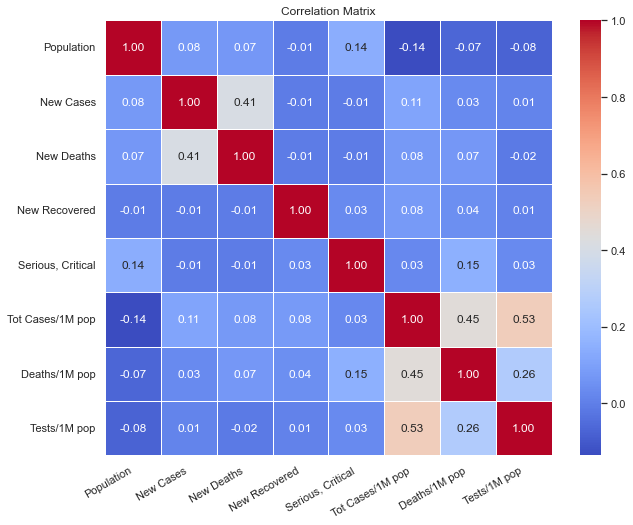

In [ ]:
# Assign the columns
columns_of_interest = ['Population','New Cases','New Deaths','New Recovered','Serious, Critical','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

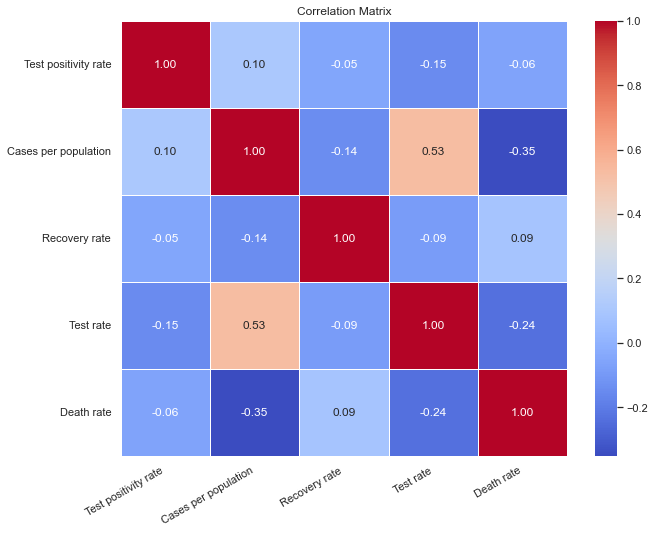

In [ ]:
#correlation
columns_of_interest = ['Test positivity rate', 'Cases per population', 'Recovery rate', 'Test rate','Death rate']

# Calculate the correlation matrix
correlation_matrix = df_new[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

<AxesSubplot:title={'center':'Global Heatmap [Scaled by 1e^6, descending by pop.]'}, ylabel='Country'>

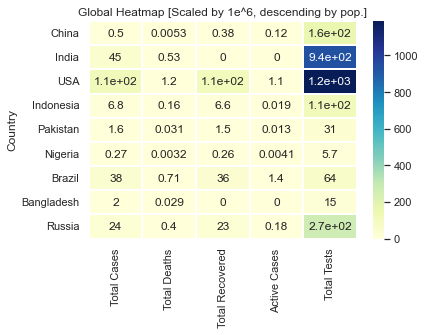

In [ ]:
#correlation
heatmap = df
heatmap = heatmap.set_index('Country')
heatmap = heatmap.sort_values('Population',ascending=False)[0:9]
heatmap = heatmap.drop(['Population','New Cases','New Deaths','New Recovered','Serious, Critical','Tot Cases/1M pop','Deaths/1M pop','Tests/1M pop'],axis=1)
heatmap = heatmap * .000001
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Global Heatmap [Scaled by 1e^6, descending by pop.]')
sns.heatmap(heatmap, cmap='YlGnBu',annot=True,linewidths=2)